# MBA em Ciência de Dados
# Técnicas Avançadas de Captura e Tratamento de Dados

### <span style="color:darkred">Módulo I - Dados Estruturados, Não Estruturados e problemas típicos em bases de dados</span>


## <span style="color:darkred">Avaliação</span>

Moacir Antonelli Ponti

CeMEAI - ICMC/USP São Carlos

---

#### <font color='red'> As respostas devem ser fornecidas no Moodle. O notebook é apenas para a implementação dos códigos que fornecerão as respostas</font>

---

In [2]:
# carregando a biblioteca necessária
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


df = pd.read_csv("TACTD-01-Base.csv")

### Exercício 1)

Considere a base de dados disponível em `TACTD-01-Base.csv`, e analise os dados faltantes no atributo 'Sex', selecionando as linhas que não sejam 'F' nem 'M'. O tipo de dados faltantes é:
 
 **--> (a) Completamente aleatório (MCAR) <--**<br>
 (b) (Condicionalmente) aleatório (MAR)<br>
 (c) Não aleatório<br>
 (d) Uma mistura de não aleatórios com MAR<br>

In [3]:
print(df['Sex'].unique(), '\n')
print(df['Sex'].describe())

['M' 'F' nan] 

count     96
unique     2
top        F
freq      49
Name: Sex, dtype: object


In [4]:
df[df['Sex'].isnull()]

,Name,Sex,Year of Birth,Country of Birth,Religion,City,Profession,Years of Experience
4,Mariann Mulero,NaN,1973,USA,Christian,New Orleans,Nurse,21.0
5,Kathey Kleiman,NaN,1973,USA,Christian,New Orleans,Nurse,18.0
6,Rupert Rollison,NaN,1986,England,Christian,Birmingham,Nurse,5.0
7,Signe Seymore,NaN,1979,England,Christian,Birmingham,Nurse,8.0


---

### Exercício 2)


Considere a base de dados disponível em `TACTD-01-Base.csv`, e analise os dados no atributo 'Religion'. Esse atributo possui os seguintes problemas:

 (a) 5 dados faltantes, sendo desses 2 dados errôneos<br>
 **--> (b) 3 dados faltantes devido a omissão do usuário <--**<br>
 (c) 5 dados errôneos, sendo desses 2 outliers<br>
 (d) 5 outliers<br>


In [5]:
print(df['Religion'].unique(), '\n')
print(df['Religion'].describe())

['Christian' 'd' nan '1'] 

count            97
unique            3
top       Christian
freq             95
Name: Religion, dtype: object


In [6]:
df[df['Religion'] != 'Christian']

,Name,Sex,Year of Birth,Country of Birth,Religion,City,Profession,Years of Experience
9,Leanne Lowy,F,1969,England,d,Birmingham,Nurse,22.0
18,Ricardo Rima,M,1977,Peru,NaN,Arequipa,Nurse,16.0
30,Amelia Caldwell,F,1977,Scotland,NaN,Edinburgh,Nurse,10.0
47,Erica Hudson,F,1980,Brazil,NaN,Santo André,Nurse,10.0
67,Marshall Vargas,M,2013,Scotland,1,Edinburgh,Nurse,NaN


---

### Exercício 3)


Considere a base de dados disponível em `TACTD-01-Base.csv`. Encontre e remova todos os dados errôneos no atributo 'Religion'. Após remover os dados, analise todos as linhas relativas a dados faltantes nesse mesmo atributo. Esses dados faltantes:

 (a) Podem ser tanto (condicionalmente) aleatórios (MAR) quanto completamente aleatórios, portanto é mais seguro considerá-los do tipo MAR<br>
 (b) São seguramente completamente aleatórios (MCAR)<br>
 ** --> (c) Podem ser tanto do tipo completamente aleatório (MCAR) quanto não-aleatórios, portanto é mais seguro considerá-los não aleatórios <--**<br>
 (d) São seguramente não aleatórios<br>


---
### Exercício 4)

Dados estruturados, quando comparados aos não-estruturados, são caracterizados por:

(a) possuir formato bem definido para armazenamento, sendo inviável executar validação dos dados<br>
(b) possibilitar maior liberdade/flexibilidade na coleta dos dados, sendo ideais para coleta com baixo controle<br>
(c) possuir campos e atributos que permitam endereçar os dados, e maior custo de manutenção<br>
(d) estar armazenado em formato binário ou de texto livre, e não permitir controle de versões


---

### Exercício 5)

Considere a base de dados disponível em `TACTD-01-Base.csv`, e analise os dados no atributo 'Years of experience' por meio do gráfico de caixa e depois visualizando as linhas contendo outliers mostrados no gráfico de caixa.

O atributo possui:

(a) 1 outlier global, e 1 outlier contextual<br>
(b) nenhum outlier, pois todos os dados são plausíveis<br>
(c) 2 outliers contextuais, sendo um deles também um outlier global<br>
(d) 2 outliers globais, sendo um deles também um outlier contextual<br>

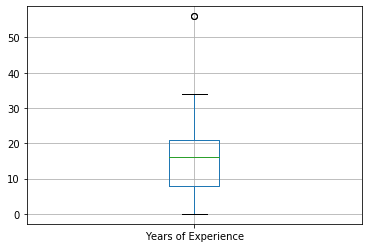

In [7]:
df.boxplot(column='Years of Experience')

In [8]:
df['Years of Experience'].describe()

count    91.000000
mean     15.483516
std      10.646191
min       0.000000
25%       8.000000
50%      16.000000
75%      21.000000
max      56.000000
Name: Years of Experience, dtype: float64

In [15]:
df[(df['Years of Experience'] > 21) | (df['Years of Experience'] < 8)].sort_values('Years of Experience', ascending = False).sort_values('Year of Birth')

,Name,Sex,Year of Birth,Country of Birth,Religion,City,Profession,Years of Experience
22,Ariel Almada,F,1930,Portugal,Christian,Lisbon,Nurse,56.0
87,Maia Banks,M,1957,USA,Christian,New Orleans,Nurse,31.0
98,Diego Colque,M,1958,Peru,Christian,Arequipa,Nurse,34.0
15,Vinicius Vitorio,M,1959,Brazil,Christian,São Paulo,Nurse,24.0
49,Vivian Arnold,F,1960,Brasil,Christian,São Paulo,Nurse,26.0
92,Norah Carey,F,1961,Scotland,Christian,Edinburgh,Nurse,31.0
43,Drew Wade,F,1962,Spain,Christian,Valencia,Nurse,32.0
66,Terri Wilson,F,1962,Canada,Christian,Vancouver,Nurse,29.0
41,Donnie Adkins,M,1962,Spain,Christian,Valencia,Nurse,28.0
99,Raelynn Murphy,F,1962,USA,Christian,New Orleans,Nurse,28.0


## Exercício 6)

Gere o gráfico de caixa do atributo 'Year of Birth' e depois selecione e imprima na tela todas as linhas em que o atributo 'Year of Birth' possui valores fora das barras de mínimo e máximo do gráfico de caixa.

Como interpretar as linhas retornadas e quais ações são mais indicadas, em termos de manter ou remover os dados supeitos?

(a) a linha 22 e a linha 67 possuem outliers e dados errôneos, todos esses valores devem ser removidos.<br>
(b) a linha 22 possui valores outliers, mas são plausíveis e podem ser mantidos; a linha 67 possui outliers e dados errôneos, os quais devem ser removidos<br>
(c) a linha 22 possui outliers e dados errôneos, os quais devem ser removidos; a linha 67 possui outliers, mas são plausíveis e podem ser mantidos<br>
(d) a linha 67 e a linha 22 possuem valores outliers, mas não é recomendado removê-los.<br>


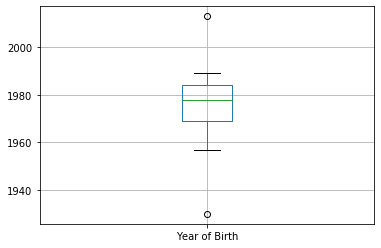

In [16]:
df.boxplot(column='Year of Birth')

In [17]:
df['Year of Birth'].describe()

count     100.000000
mean     1976.250000
std        10.522103
min      1930.000000
25%      1969.000000
50%      1978.000000
75%      1984.000000
max      2013.000000
Name: Year of Birth, dtype: float64

In [20]:
df[(df['Year of Birth'] == 2013) | (df['Year of Birth'] == 1930)].sort_values('Year of Birth', ascending=False)

,Name,Sex,Year of Birth,Country of Birth,Religion,City,Profession,Years of Experience
67,Marshall Vargas,M,2013,Scotland,1,Edinburgh,Nurse,NaN
22,Ariel Almada,F,1930,Portugal,Christian,Lisbon,Nurse,56.0
